<a href="https://colab.research.google.com/github/DevaHarshiniModepalli/DevaHarshini425/blob/main/13_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
df=pd.read_csv("/content/drive/MyDrive/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [21]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [22]:
df.isna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [23]:
df.duplicated().sum()

0

In [24]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
435,False
436,False
437,False
438,False


In [25]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [27]:
df.shape

(440, 8)

In [28]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [29]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
scaler.fit(df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']])

StandardScaler()

In [34]:
sc_data = scaler.transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']])

In [18]:
df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']] = sc_data

In [35]:
sc_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [36]:
stdr=df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']]

In [37]:
print(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].describe())

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


In [38]:
df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [39]:
stdr.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [40]:
import scipy.cluster.hierarchy as sch

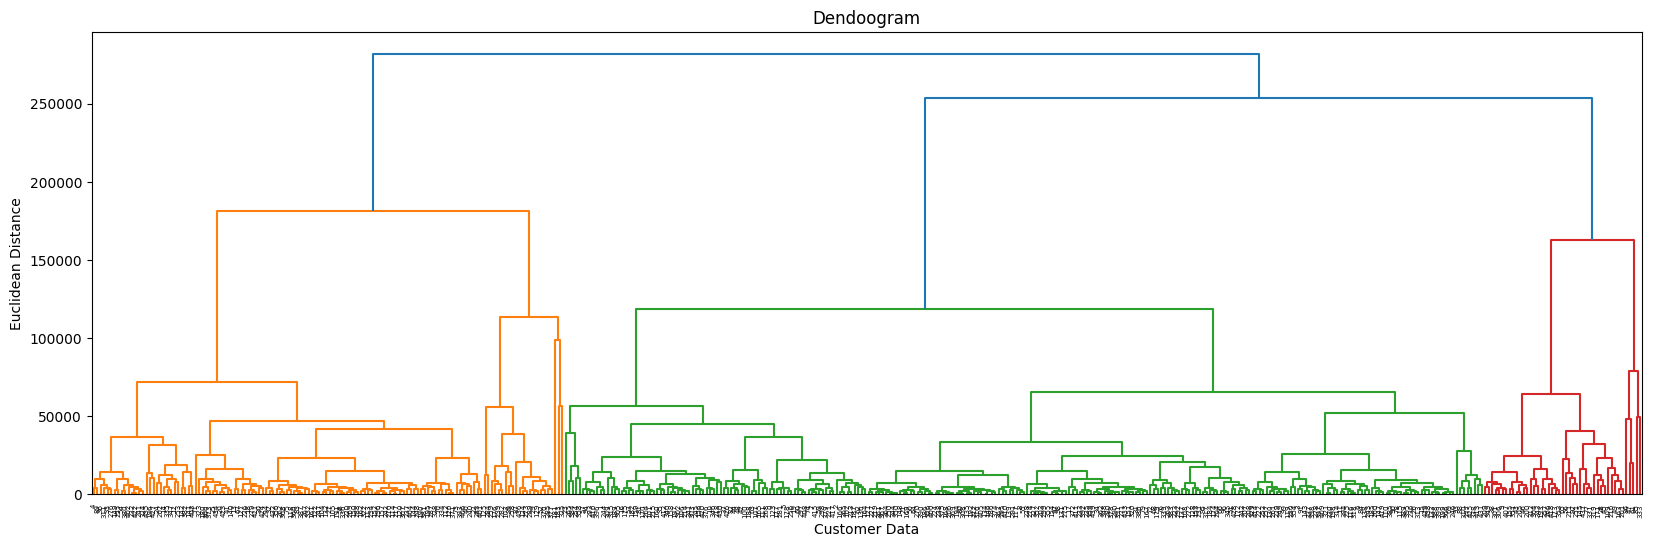

In [41]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(stdr,method='ward'))
plt.title("Dendoogram")
plt.xlabel("Customer Data")
plt.ylabel("Euclidean Distance")
plt.show()

In [42]:
len(set(dendo['color_list']))-1

3

In [43]:
from sklearn.cluster import AgglomerativeClustering


In [44]:
grp=AgglomerativeClustering(n_clusters=3)
grp.fit_predict(stdr)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,

In [45]:
cluster=grp.fit_predict(stdr)

In [46]:
grp_num=pd.DataFrame(cluster,columns=['Group'])
grp_num

,Group
0,2
1,2
2,2
3,2
4,0
...,...
435,0
436,0
437,1
438,2


In [47]:
pd.concat([df,grp_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,2


In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(stdr,cluster)

0.37501552145375117

# KMeans

In [49]:
stdr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [50]:
sc_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [51]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(sc_data)
  wcss.append(kmeans.inertia_)

In [52]:
wcss # with in clusters sum if squares!!

[2266.9552665832457,
 1644.0598512347563,
 1326.6746082135523,
 1070.2551995135614,
 989.3326418885056,
 856.7070228388113,
 791.8280762163158,
 710.1943394067521,
 668.22250548469]

In [53]:
len(wcss)

9

In [54]:
for i in range(2,11):
  print(i)

2
3
4
5
6
7
8
9
10


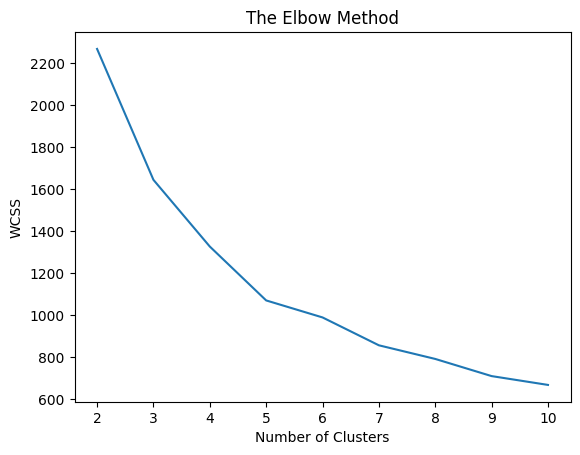

In [55]:
plt.plot(range(2,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") # with in clusters sum if squares!!
plt.show()

In [56]:
model=KMeans(n_clusters=5,random_state=42)
grps=model.fit_predict(stdr)

In [57]:
type(grps)

numpy.ndarray

In [62]:
import numpy as np
np.ndarray

numpy.ndarray

In [59]:
grps

array([4, 4, 4, 4, 1, 4, 4, 4, 4, 0, 0, 4, 1, 1, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 2, 1, 1, 4, 4, 0, 1, 1, 4, 1, 1, 4, 0, 1, 0, 0, 3, 1, 1, 0, 0,
       4, 0, 0, 2, 4, 0, 4, 4, 1, 0, 1, 4, 0, 0, 4, 4, 4, 2, 4, 0, 4, 2,
       4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 0, 4, 4, 4, 0, 0, 1, 4, 2, 2, 3,
       4, 1, 4, 4, 2, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 3, 4, 1, 0, 0, 4, 0,
       4, 0, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 3, 1, 1, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 0, 4, 4, 4, 1, 1, 4, 1, 4,
       4, 0, 0, 1, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       3, 4, 4, 4, 4, 3, 0, 3, 4, 4, 4, 4, 0, 0, 1, 4, 4, 0, 4, 1, 1, 0,
       4, 4, 0, 0, 1, 4, 4, 0, 4, 4, 4, 0, 1, 2, 4, 4, 0, 0, 0, 1, 0, 4,
       4, 0, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 3, 1, 1,
       1, 4, 0, 0, 4, 4, 1, 4, 4, 2, 4, 1, 4, 1, 4, 4, 3, 3, 4, 4, 1, 4,
       0, 0, 0, 1, 0, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 3, 1, 3, 1,
       4, 1, 1, 1, 4, 4, 4, 0, 1, 4, 1, 4, 4, 4, 1,

In [63]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [64]:
grp_num=pd.DataFrame(grps,columns=['Group'])
grp_num

,Group
0,4
1,4
2,4
3,4
4,1
...,...
435,1
436,1
437,0
438,4


In [67]:
ckd=pd.concat([df,grp_num],axis=1)
ckd

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,4
1,7057,9810,9568,1762,3293,1776,4
2,6353,8808,7684,2405,3516,7844,4
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,4


In [69]:
ckd[ckd['Group']==2]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
23,26373,36423,22019,5154,4337,16523,2
47,44466,54259,55571,7782,24171,6465,2
61,35942,38369,59598,3254,26701,2017,2
65,85,20959,45828,36,24231,1423,2
85,16117,46197,92780,1026,40827,2944,2
86,22925,73498,32114,987,20070,903,2
92,9198,27472,32034,3232,18906,5130,2
211,12119,28326,39694,4736,19410,2870,2
251,6134,23133,33586,6746,18594,5121,2
333,8565,4980,67298,131,38102,1215,2


In [70]:
ckd[ckd['Group']==4]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,4
1,7057,9810,9568,1762,3293,1776,4
2,6353,8808,7684,2405,3516,7844,4
3,13265,1196,4221,6404,507,1788,4
5,9413,8259,5126,666,1795,1451,4
...,...,...,...,...,...,...,...
429,8607,1750,3580,47,84,2501,4
431,8533,5506,5160,13486,1377,1498,4
433,1982,3218,1493,1541,356,1449,4
438,10290,1981,2232,1038,168,2125,4


In [71]:
np.round(silhouette_score(stdr,grps),2)

0.38